In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Input,BatchNormalization,Activation

In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
cifar10 = tf.keras.datasets.cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
x_train,x_test  =  x_train/255.0,x_test/255.0

In [4]:
def conv_1(filter,stride,input_shape):
    x_1 = Conv2D(filters=filter, kernel_size=(3,3),strides=stride,padding='same',use_bias=False)(input_shape)
    x_1 = BatchNormalization()(x_1)
    x_1 = Activation(activation='relu')(x_1)
    
    return x_1

def conv_2(filter,input_shape):
    x_2= Conv2D(filters=filter, kernel_size=(3,3),strides=1,padding='same',use_bias=False)(input_shape)
    x_2 = BatchNormalization()(x_2)
    x_2 = Activation(activation='relu')(x_2)
    return x_2

def conv_3(filter,stride,input_shape):
    x_3= Conv2D(filters=filter, kernel_size=(1,1),strides=stride,padding='same',use_bias=False)(input_shape)
    x_3 = BatchNormalization()(x_3)
    x_3 = Activation(activation='relu')(x_3)
    return x_3
def conv_4(filter,input_shape):
    x_4= Conv2D(filters=filter, kernel_size=(1,1),strides=1,padding='same',use_bias=False)(input_shape)
    x_4 = BatchNormalization()(x_4)
    x_4 = Activation(activation='relu')(x_4)
    return x_4

In [5]:
def residual_error_1(filter,stride,input_shape):
    layer_1 = conv_1(filter,stride,input_shape)
    layer_2 = conv_2(filter,layer_1)
    layer_jump = conv_3(filter,stride,input_shape)
    out = tf.keras.layers.add([layer_2,layer_jump])
    return out

def residual_error_2(filter,input_shape):
    layer_1 = conv_2(filter,input_shape)
    layer_2 = conv_2(filter,layer_1)
    layer_jump = conv_4(filter,input_shape)
    out = tf.keras.layers.add([layer_2,layer_jump])    
    return out
    

In [6]:
input_shape = Input(shape=(32, 32, 3))

In [7]:
one_layer = conv_2(64,input_shape)

In [8]:
two_layer = residual_error_2(64,one_layer)

In [9]:
three_layer = residual_error_2(64,two_layer)

In [10]:
four_layer = residual_error_1(128,2,three_layer)

In [11]:
five_layer = residual_error_2(128,four_layer)

In [12]:
six_layer = residual_error_2(256,five_layer)

In [13]:
seven_layer = residual_error_2(256,six_layer)

In [14]:
eight_layer = residual_error_2(512,seven_layer)

In [15]:
nine_layer = residual_error_2(512,eight_layer)

In [16]:
flatton_layer = tf.keras.layers.GlobalAveragePooling2D()(nine_layer)

In [17]:
output = tf.keras.layers.Dense(10,activation='softmax')(flatton_layer)

In [18]:
model = tf.keras.models.Model(inputs=input_shape,outputs=output)

In [19]:
model.compile(optimizer='adam',
               loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics = ['acc'])

In [20]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 32, 32, 64)   1728        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 32, 32, 64)   256         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 32, 32, 64)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

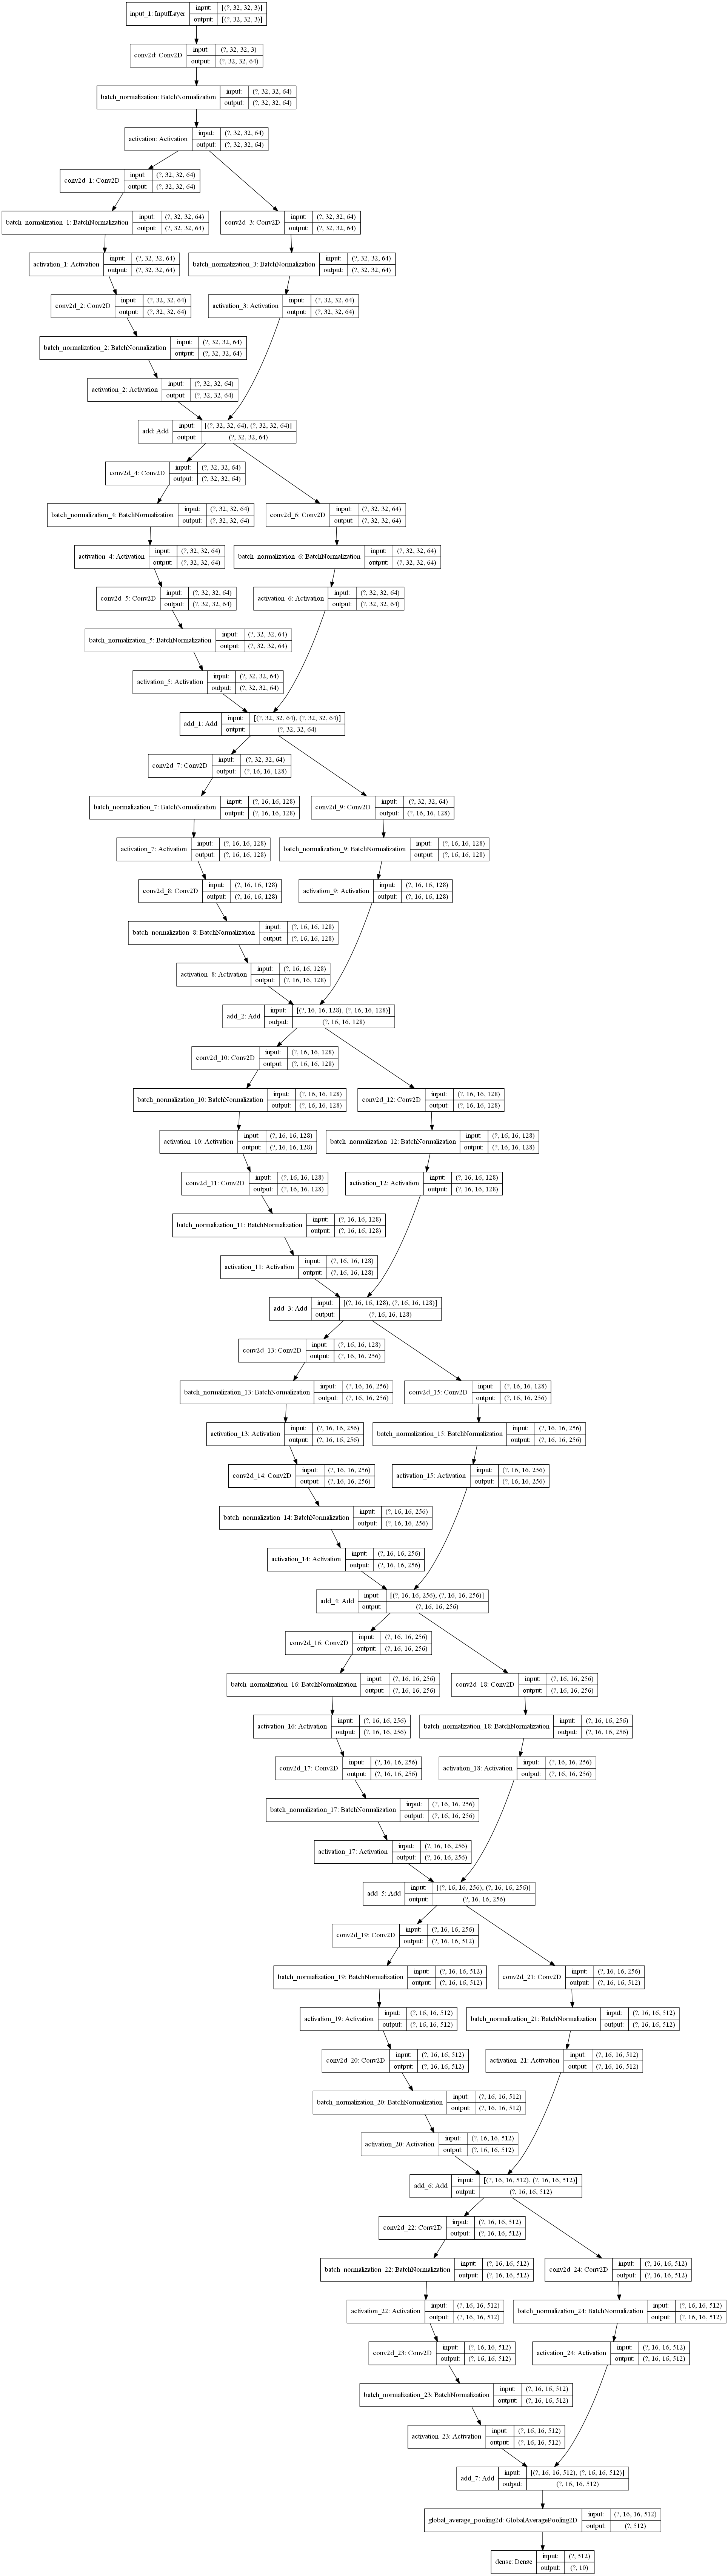

In [21]:
tf.keras.utils.plot_model(model,to_file="model1.png",show_shapes=True)

In [22]:
history = model.fit(x_train,y_train,
                    batch_size=16,
                    epochs=5,
                    validation_data = (x_test,y_test),
                    validation_freq=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 273s 5ms/sample - loss: 1.4990 - acc: 0.4398 - val_loss: 1.2514 - val_acc: 0.5520
Epoch 2/5
50000/50000 [==============================] - 267s 5ms/sample - loss: 1.0259 - acc: 0.6364 - val_loss: 1.2987 - val_acc: 0.5700
Epoch 3/5
50000/50000 [==============================] - 339s 7ms/sample - loss: 0.7852 - acc: 0.7269 - val_loss: 0.9103 - val_acc: 0.6855
Epoch 4/5
50000/50000 [==============================] - 269s 5ms/sample - loss: 0.6461 - acc: 0.7781 - val_loss: 1.0038 - val_acc: 0.6538
Epoch 5/5
50000/50000 [==============================] - 269s 5ms/sample - loss: 0.5449 - acc: 0.8128 - val_loss: 0.9173 - val_acc: 0.7209


In [23]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [24]:
loss =  history.history.get('loss')
val_loss =history.history.get('val_loss')

In [25]:
acc =  history.history.get('acc')
val_acc =history.history.get('val_acc')

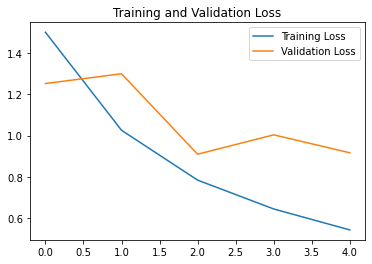

In [26]:
import matplotlib.pyplot as plt
plt.plot(loss,label='Training Loss')
plt.plot(val_loss,label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

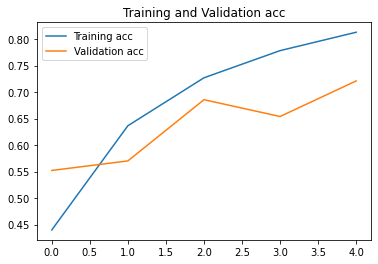

In [27]:
plt.plot(acc,label='Training acc')
plt.plot(val_acc,label='Validation acc')
plt.title('Training and Validation acc')
plt.legend()